In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import skimage.feature

In [29]:
def read_digits(file, digits_per_class):
  original_img = plt.imread(file)
  digit_size = 20
  
  num_rows, num_cols = original_img.shape
  num_rows_digits = num_rows // digit_size
  num_cols_digits = num_cols // digit_size
  
  all_digits_images = []
  for i in range(num_rows_digits):
    for j in range(num_cols_digits):
      d_img = original_img[i * digit_size: (i+1)*digit_size,
                           j * digit_size: (j+1)*digit_size]
      all_digits_images.append(d_img)
      
  return all_digits_images  

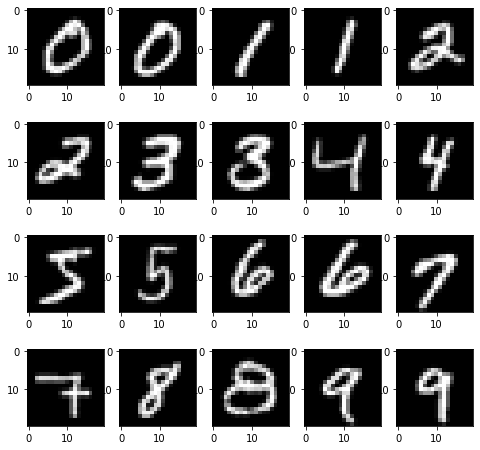

In [30]:
digit_per_class = 500
num_class = 10
all_digit_images =  read_digits('digits.png', digit_per_class)

k = 0
plt.figure(figsize=[8, 8])
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(all_digit_images[k], 'gray')
  k += digit_per_class // 2

In [31]:
from posixpath import split


split_amount = digit_per_class // 2
train_imgs = []
test_imgs = []

for c in range(num_class):
  class_images = all_digit_images[c * digit_per_class:
                                 (c+1) * digit_per_class]
  train_imgs.extend(class_images[:split_amount])
  test_imgs.extend(class_images[split_amount:])

labels = []
for c in range(num_class):
  labels.extend([c] * split_amount)

labels = np.array(labels)
np.bincount(labels)

array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250])

In [32]:
def hog_properties(img_list, nbins, cell_size, block_size):
  hog_data = []
  
  for img in img_list:
    # Recebe uma imagem e retorna um vetor de 324 caracteristicas
    hog = skimage.feature.hog(img, 
                              orientations=nbins, 
                              pixels_per_cell=cell_size,
                              cells_per_block=block_size)
    hog_data.append(hog)
    
  return np.array(hog_data)

nbins = 9
cell_size = (5, 5)
block_size = (2, 2)
train_data = hog_properties(train_imgs, nbins, cell_size, block_size)

In [33]:
train_data.shape

(2500, 324)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, labels)

KNeighborsClassifier(n_neighbors=3)

In [35]:
test_data = hog_properties(test_imgs, nbins, cell_size, block_size)

predictions = knn.predict(test_data)

In [36]:
mask = predictions == labels

num_equal = np.sum(mask) 

100 * num_equal / len(predictions)

93.56